In [11]:
%load_ext lab_black

# EDA & dataset introduction

Credits for: 
* RAVI CHAUBE - [https://www.kaggle.com/code/ravichaubey1506/end-to-end-machine-learning/notebook](https://www.kaggle.com/code/ravichaubey1506/end-to-end-machine-learning/notebook)
* FKRFORTHINK - [https://www.kaggle.com/code/takedown/complete-tutorial-for-beginners/notebook](https://www.kaggle.com/code/takedown/complete-tutorial-for-beginners/notebook)

In [17]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)

import warnings

warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [13]:
housing = pd.read_csv("../resources/data/housing.csv")

In [20]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Plotting distribution 

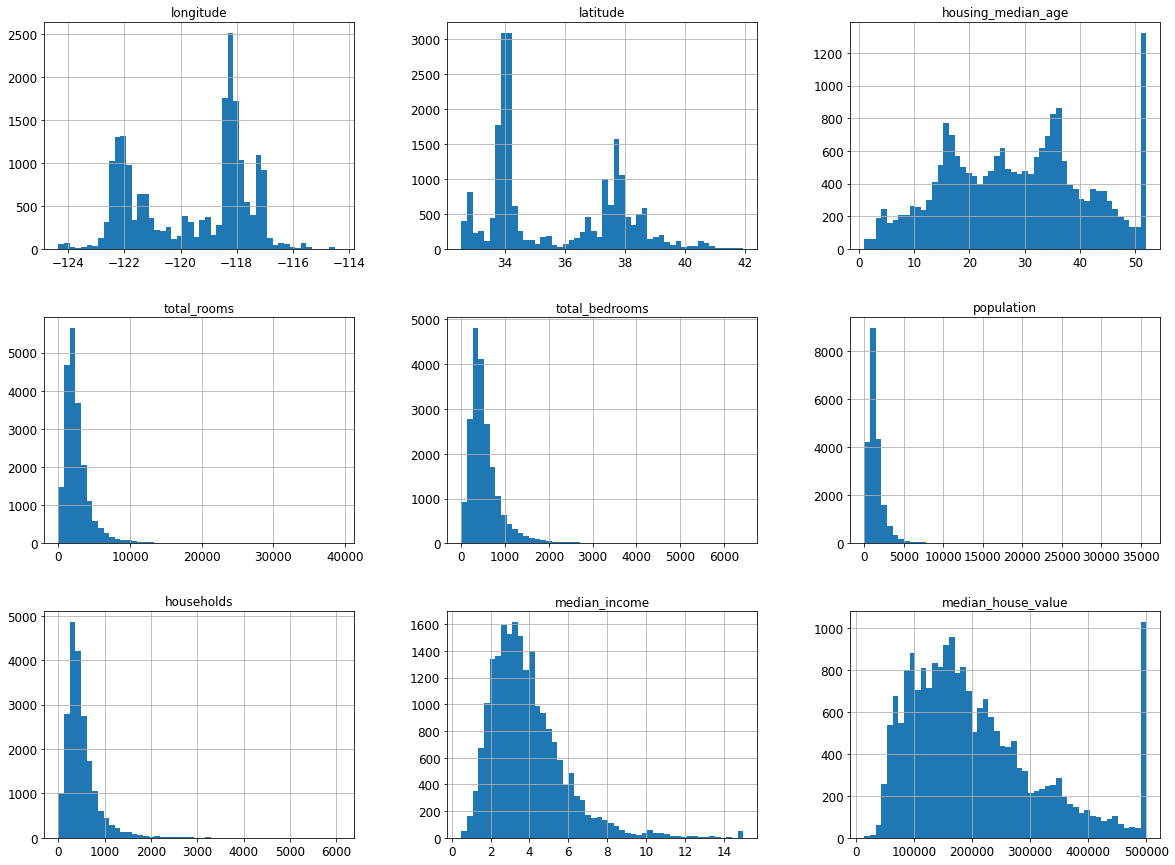

In [22]:
housing.hist(bins=50, figsize=(20, 15))
plt.show()

It worth mentioning that `median_house_value` and `housing_median_age` was cut to 500000 and 52 respectively. 

## Plotting data on map

/tmp/ipykernel_334/3615361471.py:6: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``np.array(PIL.Image.open(urllib.request.urlopen(url)))``.
  california_img = mpimg.imread(
/tmp/ipykernel_334/3615361471.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(["$%dk" % (round(v / 1000)) for v in tick_values], fontsize=14)


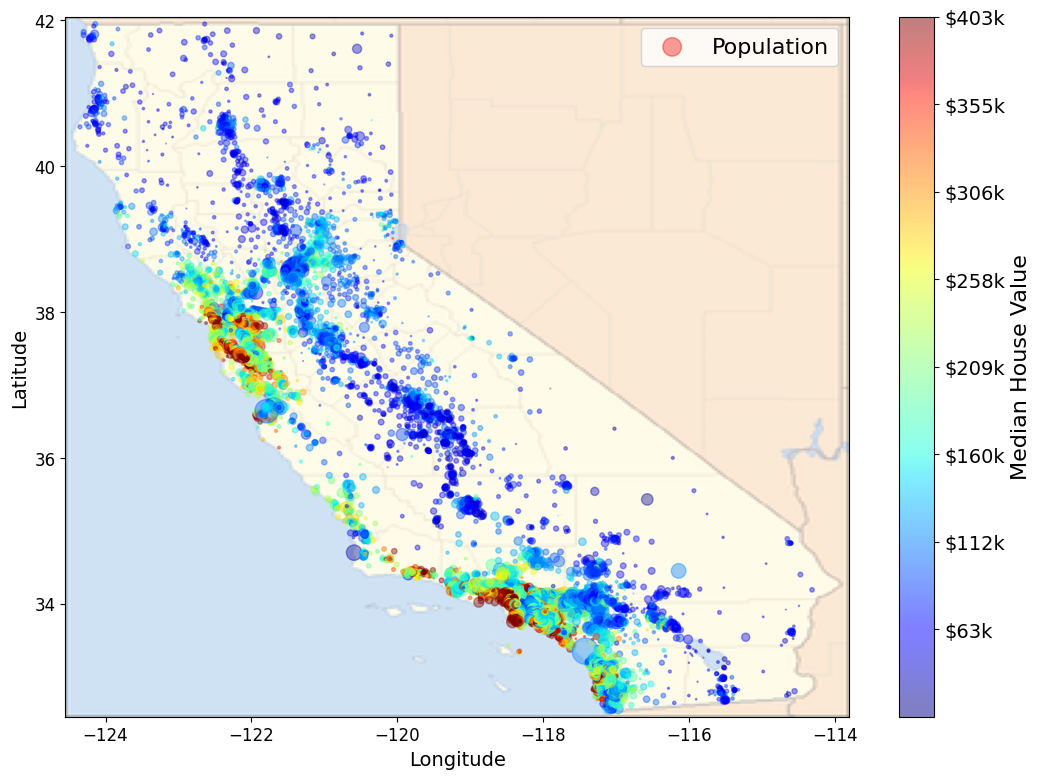

In [15]:
fig = plt.figure(dpi=100, figsize=(4, 4))
ax = fig.add_axes([1, 1, 1, 1])

import matplotlib.image as mpimg

california_img = mpimg.imread(
    "https://upload.wikimedia.org/wikipedia/commons/thumb/1/1b/California_Locator_Map.PNG/280px-California_Locator_Map.PNG"
)
housing.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    figsize=(10, 7),
    ax=ax,
    s=housing["population"] / 100,
    label="Population",
    c="median_house_value",
    cmap=plt.get_cmap("jet"),
    colorbar=False,
    alpha=0.4,
)
plt.imshow(
    california_img,
    extent=[-124.55, -113.80, 32.45, 42.05],
    alpha=0.5,
    cmap=plt.get_cmap("jet"),
)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk" % (round(v / 1000)) for v in tick_values], fontsize=14)
cbar.set_label("Median House Value", fontsize=16)

plt.legend(fontsize=16)
plt.show()

Map clearly shows that we can expect higher prices in the area of San Francisco  and Los Angeles agglomerations. This can be easily used by neural netowrk, while less complicated models could learn that from variables such as `population`.

## Correlations

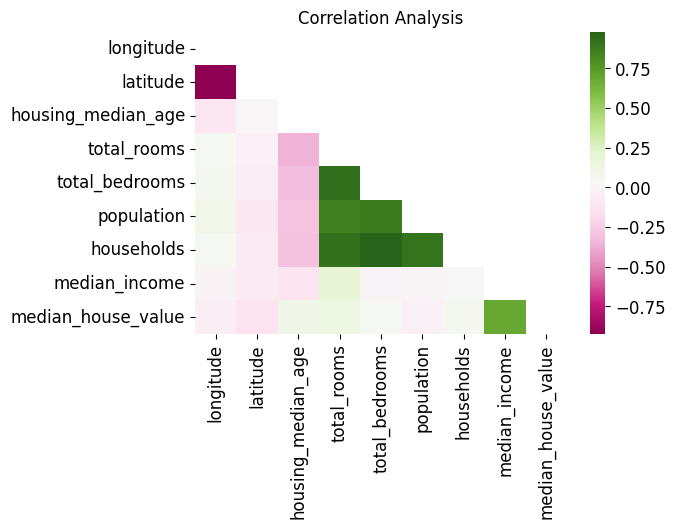

In [16]:
corr = housing.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(dpi=100)
plt.title("Correlation Analysis")
sns.heatmap(
    corr, mask=mask, annot=False, lw=0, linecolor="white", cmap="PiYG", fmt="0.2f"
)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

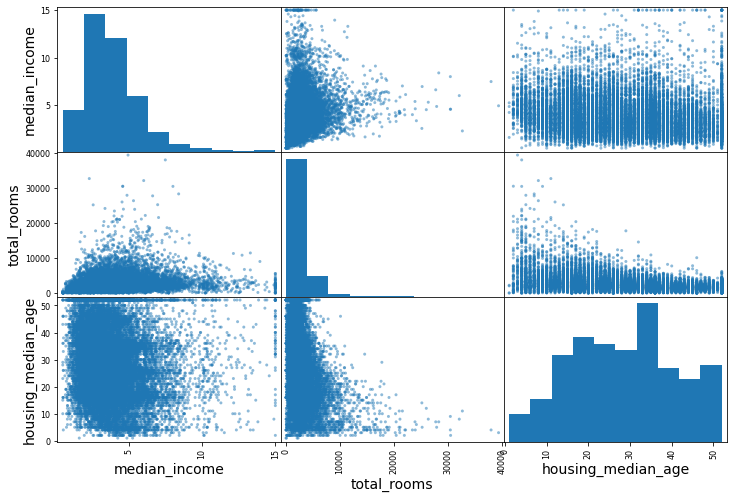

In [21]:
attributes = [
    "median_income",
    "total_rooms",
    "housing_median_age",
]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

As shown above, none of the highly correlated variables are truely linear dependent, so we decide not to replace them by thier combination, as it would coused in information loss. We will also not create such a variables while not removing original ones, as it would add more interactions to model and make explanaiton proccess more difficult.  